In [130]:
# prompt: import all necesary libraries to perform EDA & Data cleaning, visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# For displaying plots inline
%matplotlib inline


In [131]:
df = pd.read_csv('/content/Bank_details.csv')

In [132]:
df.shape

(41188, 21)

In [133]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [135]:
df.y.value_counts()

,count
y,
no,36548
yes,4640


In [136]:
df.y.value_counts(normalize=True)*100

,proportion
y,
no,88.734583
yes,11.265417


In [137]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [138]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [139]:
cols = ['job', 'marital', 'education', 'default', 'housing' ,'loan', 'month', 'poutcome']
for c in cols:
    print(df[c].value_counts(),"\n")
    print("="*70)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64 

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64 

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64 

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64 

month
may    13769
jul     7174
aug     6178
jun     531

In [140]:
# df.drop('contact', axis=1, inplace=True)

In [141]:
df.age.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


<ipython-input-142-1b9352b7d5c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


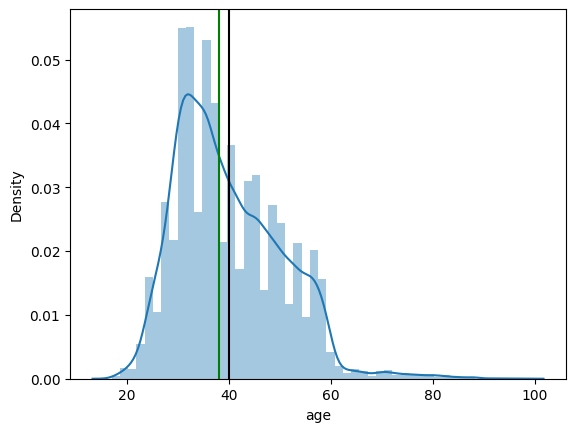

0.7846968157646645


In [142]:
%matplotlib inline
sns.distplot(df.age)
plt.axvline(df.age.mean(), color='black')
plt.axvline(df.age.median(), color='green')
plt.show()
print(df.age.skew())

<Figure size 1000x500 with 0 Axes>

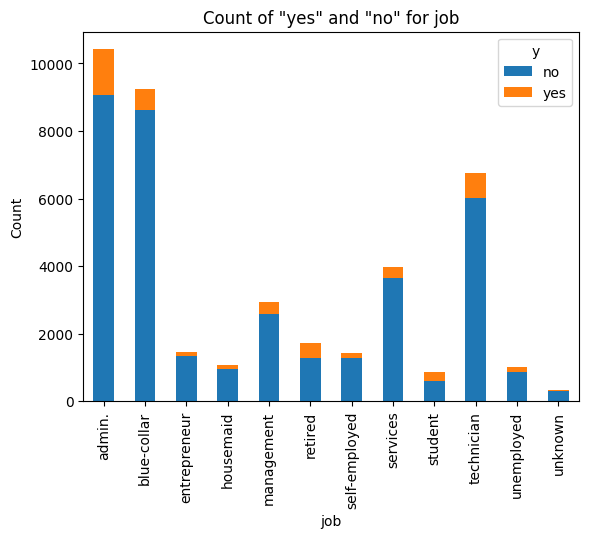

<Figure size 1000x500 with 0 Axes>

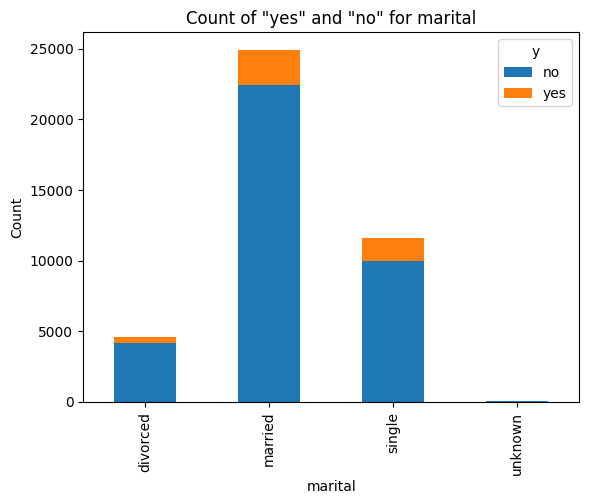

<Figure size 1000x500 with 0 Axes>

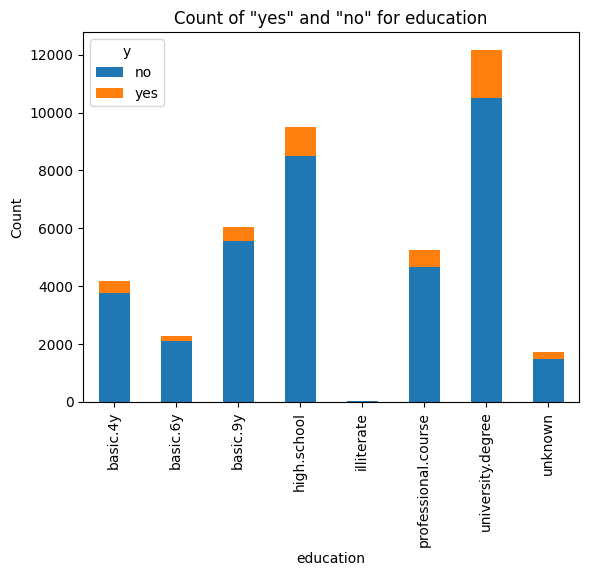

<Figure size 1000x500 with 0 Axes>

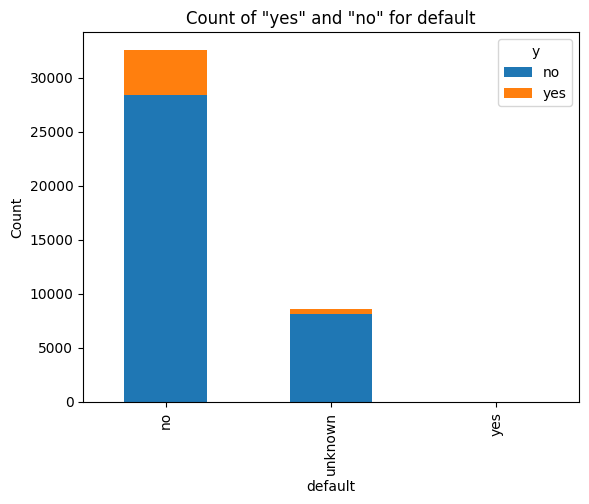

<Figure size 1000x500 with 0 Axes>

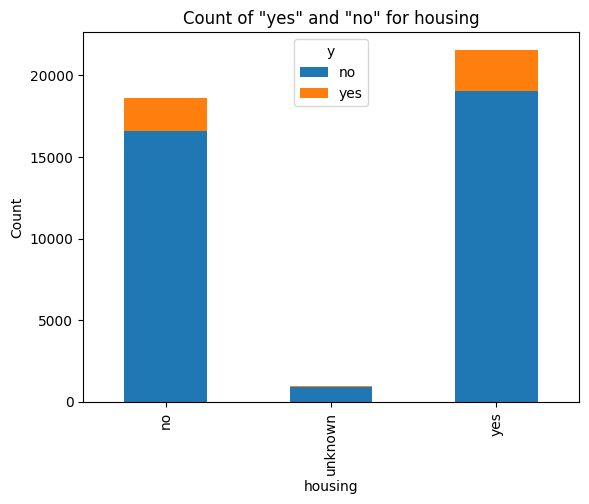

<Figure size 1000x500 with 0 Axes>

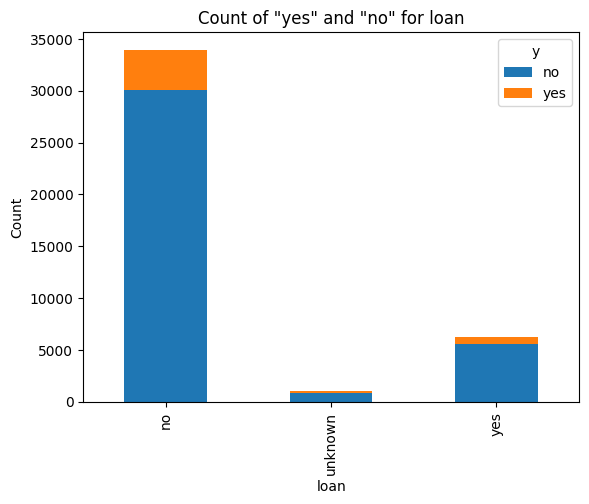

<Figure size 1000x500 with 0 Axes>

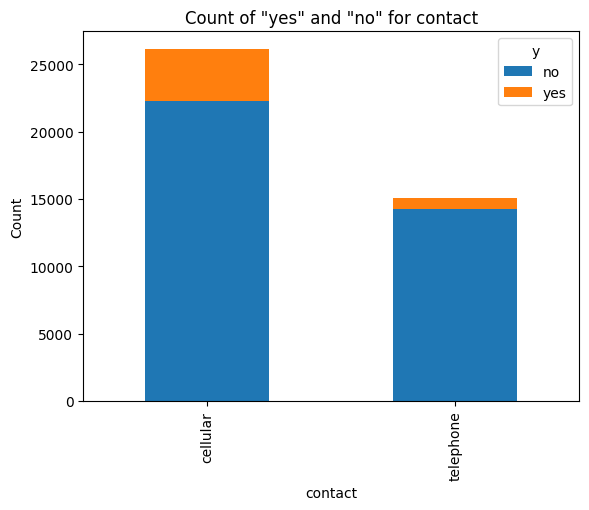

<Figure size 1000x500 with 0 Axes>

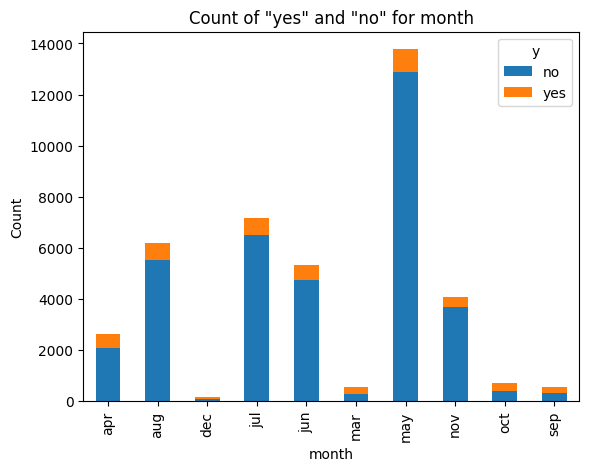

<Figure size 1000x500 with 0 Axes>

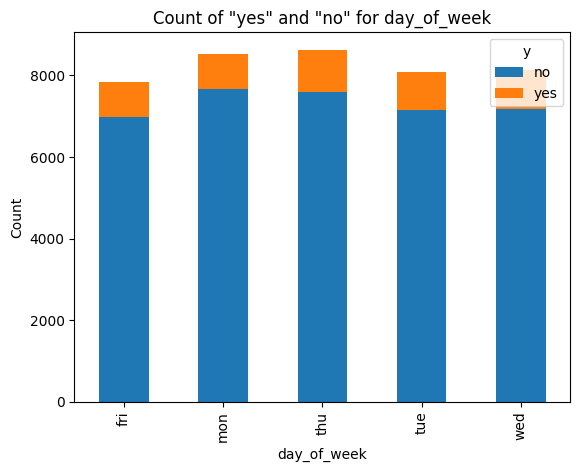

<Figure size 1000x500 with 0 Axes>

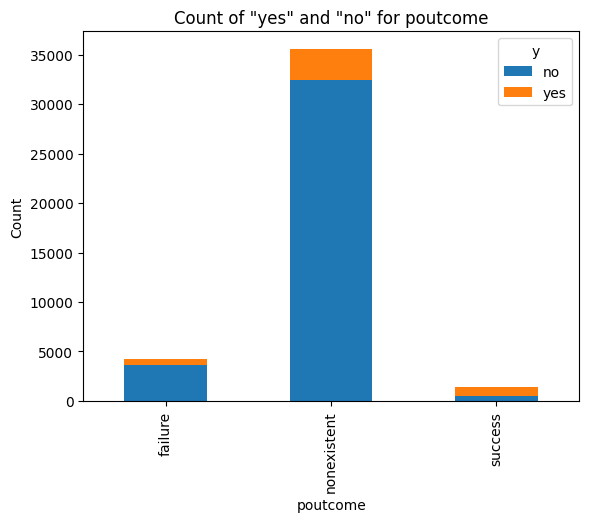

In [143]:

import matplotlib.pyplot as plt
for column in df.select_dtypes(include=['object']).columns:
  if column != 'y':  # Exclude the target variable 'y'
    plt.figure(figsize=(10, 5))
    df.groupby([column])['y'].value_counts().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Count of "yes" and "no" for {column}')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.legend(title='y')
    plt.show()


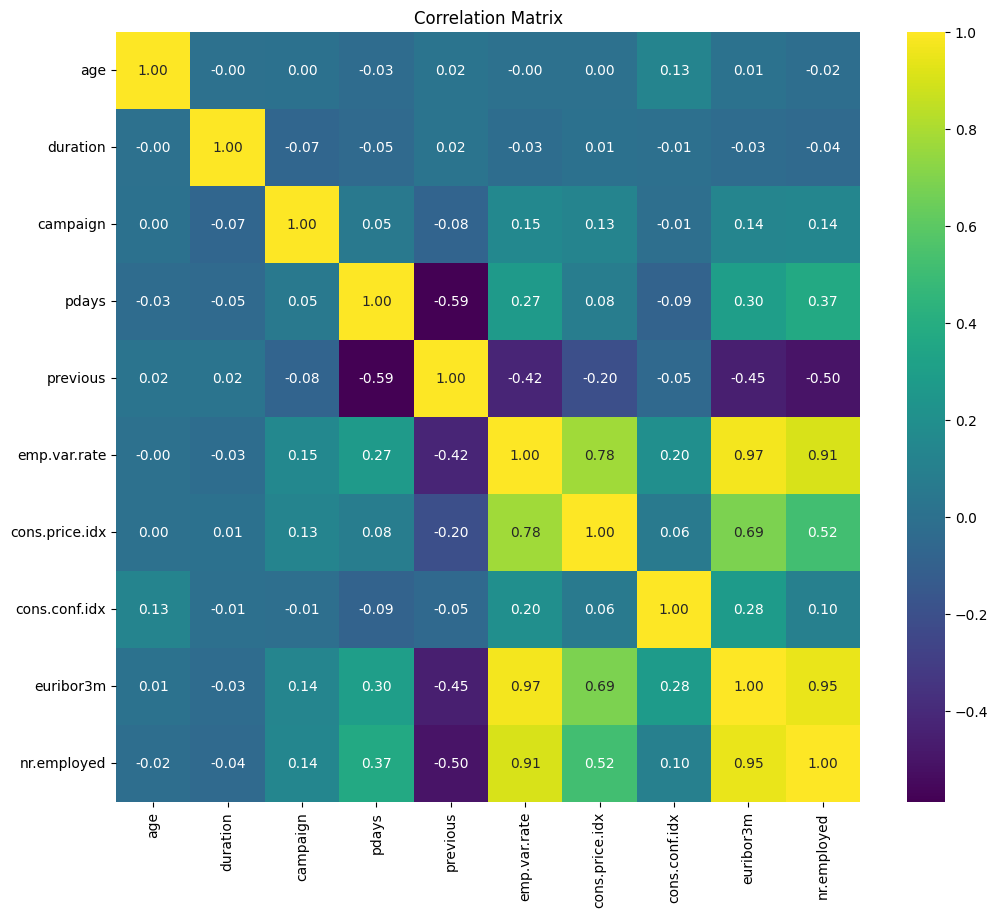

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f") # Calculate correlation for numerical columns only.
plt.title('Correlation Matrix')
plt.show()

In [145]:
df.age.skew()

0.7846968157646645

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [147]:
x= df.drop('y', axis=1)
y= df.y

In [148]:
x = pd.get_dummies(x, columns=x.select_dtypes(include=['object']).columns , drop_first=True)

In [149]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  bool   
 11  job_entrepreneur               41188 non-null  bool   
 12  job_housemaid                  41188 non-null 

In [150]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 10))
# sns.heatmap(x.corr(), annot=True, cmap='viridis', fmt=".2f") # Calculate correlation for numerical columns only.
# plt.title('Correlation Matrix')
# plt.show()

In [151]:
condition = df.poutcome == 'nonexistent'
dataset2 = df.drop(df[condition].index, axis = 0, inplace = False)

In [152]:
dataset2[['job','education']] = dataset2[['job','education']].replace(['unknown'],'other')

In [153]:
dataset2.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dataset4, new_column, old_column):
    dataset2[new_column] = dataset2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset2[new_column].value_counts()

convert(dataset2, "response_binary", "response")

,count
response_binary,
0,4126
1,1499


<ipython-input-154-e3e2fc13e2c7>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate('March: Peak Subscription rate', xy=(3, subscription_rate_by_month[3]), xytext=(4, subscription_rate_by_month[3]+5),
<ipython-input-154-e3e2fc13e2c7>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate('May: Peak of contact', xy=(5, contact_rate_by_month[5]), xytext=(6, contact_rate_by_month[5]+5),


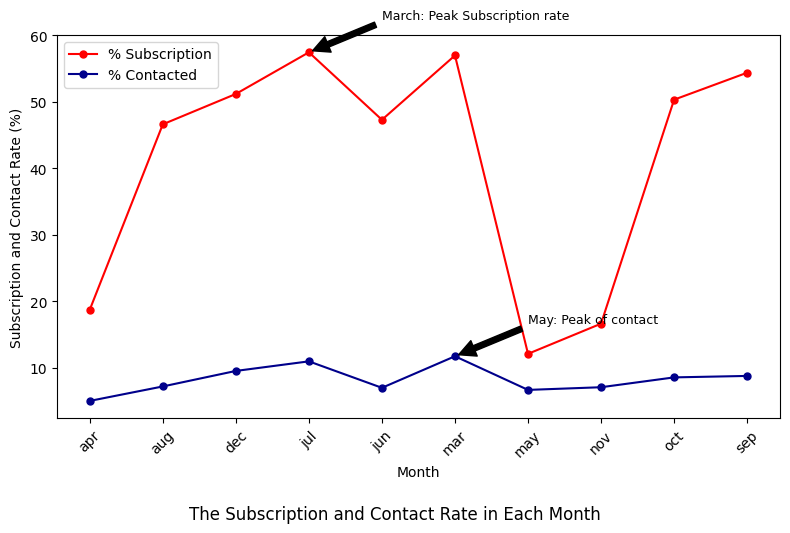

In [154]:
dataset2.rename(columns={'y': 'response'}, inplace=True)

# Create a binary column for subscription (0 = no, 1 = yes)
dataset2['response_binary'] = dataset2['response'].apply(lambda x: 0 if x == 'no' else 1)

# Group by month and calculate the subscription and contact rates
subscription_rate_by_month = dataset2.groupby('month')['response_binary'].mean() * 100  # As a percentage
contact_rate_by_month = dataset2.groupby('month')['contact'].value_counts(normalize=True).unstack().fillna(0) * 100
contact_rate_by_month = contact_rate_by_month['telephone']  # Assuming 'telephone' is a contact type

# Create the plot
plt.figure(figsize=(8, 5))

# Plot subscription rate in red
plt.plot(subscription_rate_by_month.index, subscription_rate_by_month, marker='o', label='% Subscription', color='red', markersize=5)

# Plot contact rate in dark blue
plt.plot(contact_rate_by_month.index, contact_rate_by_month, marker='o', label='% Contacted', color='darkblue', markersize=5)

# Add annotations for peaks
plt.annotate('March: Peak Subscription rate', xy=(3, subscription_rate_by_month[3]), xytext=(4, subscription_rate_by_month[3]+5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)
plt.annotate('May: Peak of contact', xy=(5, contact_rate_by_month[5]), xytext=(6, contact_rate_by_month[5]+5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)

# Add labels
plt.xlabel('Month', fontsize=10)
plt.ylabel('Subscription and Contact Rate (%)', fontsize=10)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=10)

# Add title at a lower position
plt.figtext(0.5, -0.05, 'The Subscription and Contact Rate in Each Month', ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [155]:
dataset2['duration'] = dataset2['duration'].apply(lambda n:n/60).round(2)

In [156]:
lst = [dataset2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [157]:
condition2 = (dataset2['duration']<5/60)
dataset4 = dataset2.drop(dataset2[condition2].index, axis = 0, inplace = False)

In [158]:
condition3 = (dataset4['education'] == 'other')
dataset5 = dataset4.drop(dataset4[condition3].index, axis = 0, inplace = False)

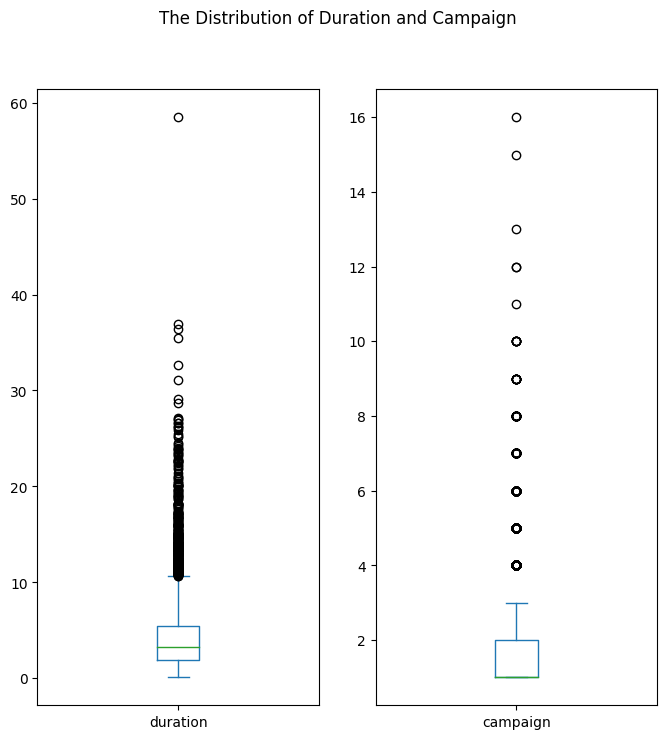

In [159]:
dist_dur_cam = dataset5[['duration','campaign']].plot(kind = 'box',
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

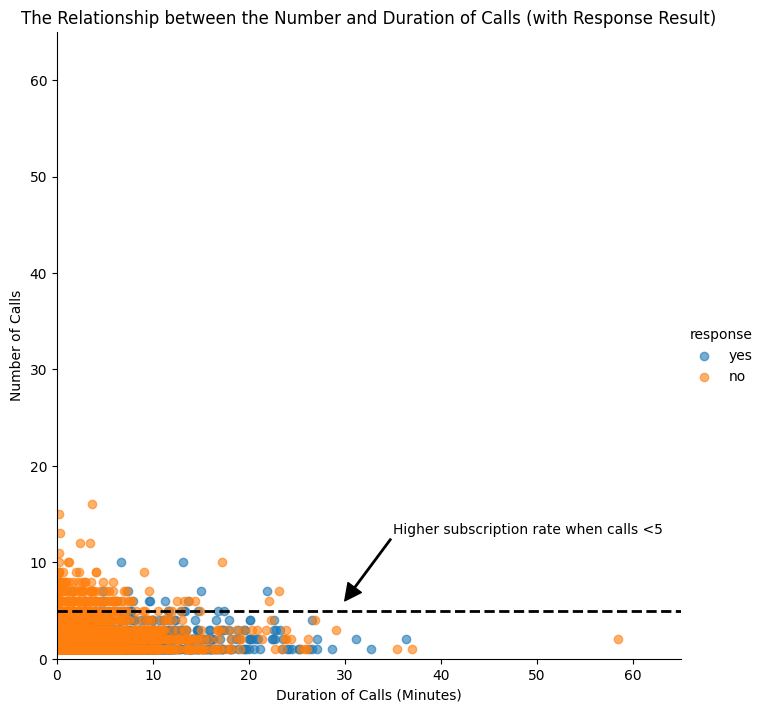

In [160]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset5,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

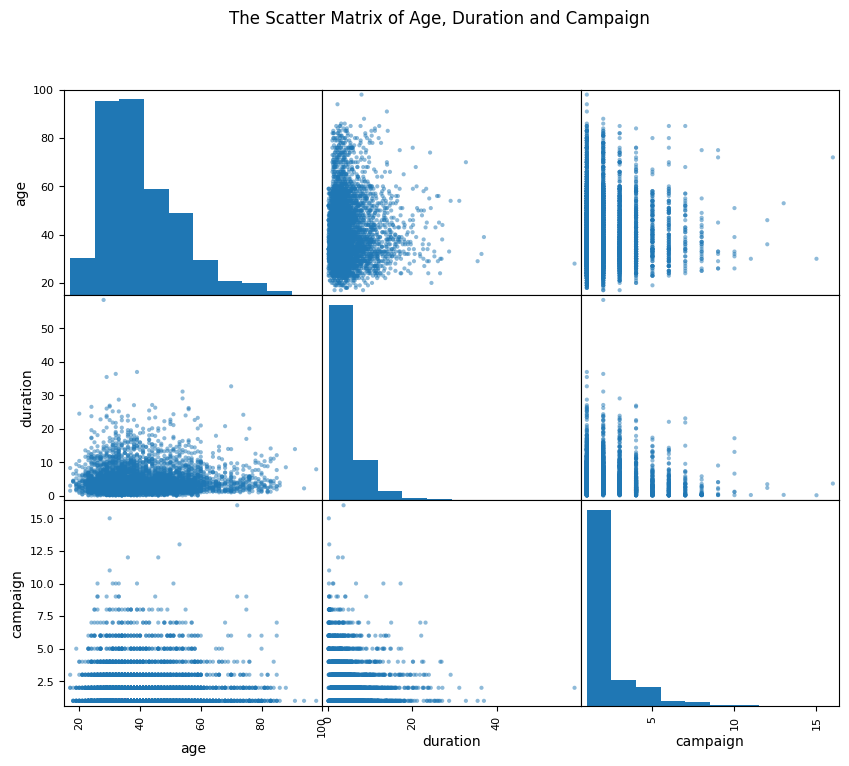

In [161]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset5[['age','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Duration and Campaign')
plt.show()

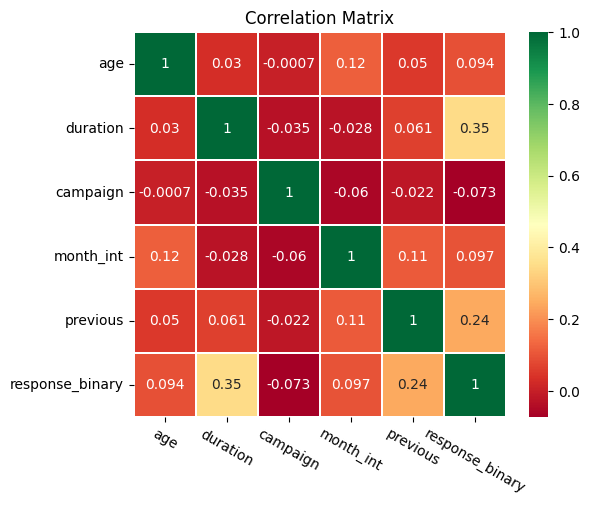

In [162]:
corr_data = dataset5[['age','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [163]:
count_job_response_pct = pd.crosstab(dataset5['response'],dataset5['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

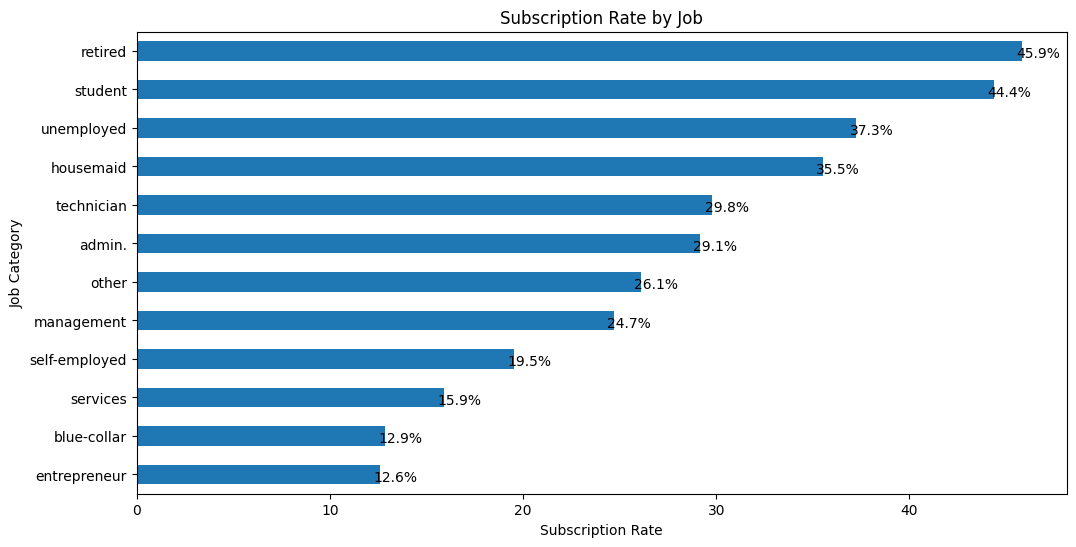

In [164]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')

<ipython-input-165-bf8fc49ea738>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_rate = dataset5.groupby('age_group')['response_binary'].mean()
<ipython-input-165-bf8fc49ea738>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_rate.index, y=subscription_rate, palette='Greens')  # Set color to green


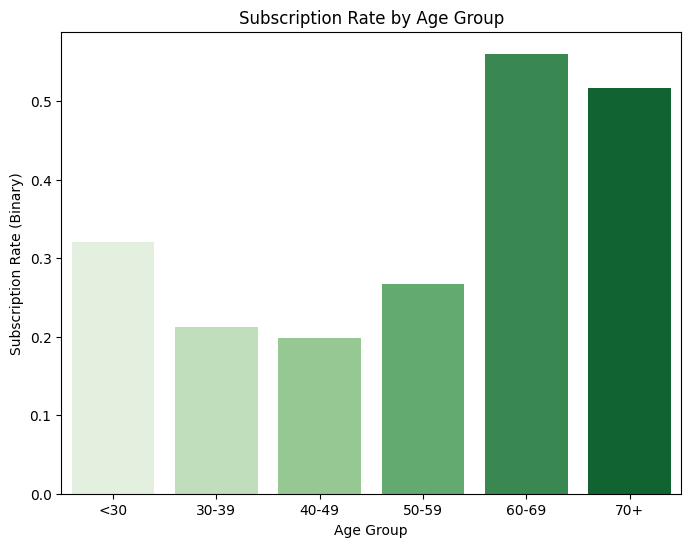

In [165]:
dataset5['response_binary'] = dataset5['response'].apply(lambda x: 0 if x == 'no' else 1)

# Define age groups
dataset5['age_group'] = pd.cut(dataset5['age'], bins=[0, 29, 39, 49, 59, 69, 100], labels=['<30', '30-39', '40-49', '50-59', '60-69', '70+'])

# Calculate subscription rate by age group using 'response_binary'
subscription_rate = dataset5.groupby('age_group')['response_binary'].mean()

# Plot subscription rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(x=subscription_rate.index, y=subscription_rate, palette='Greens')  # Set color to green
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (Binary)')
plt.show()

<ipython-input-166-293227929254>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=subscription_rate_by_age.index, y=subscription_rate_by_age, palette='oranges')  # Line plot with green color


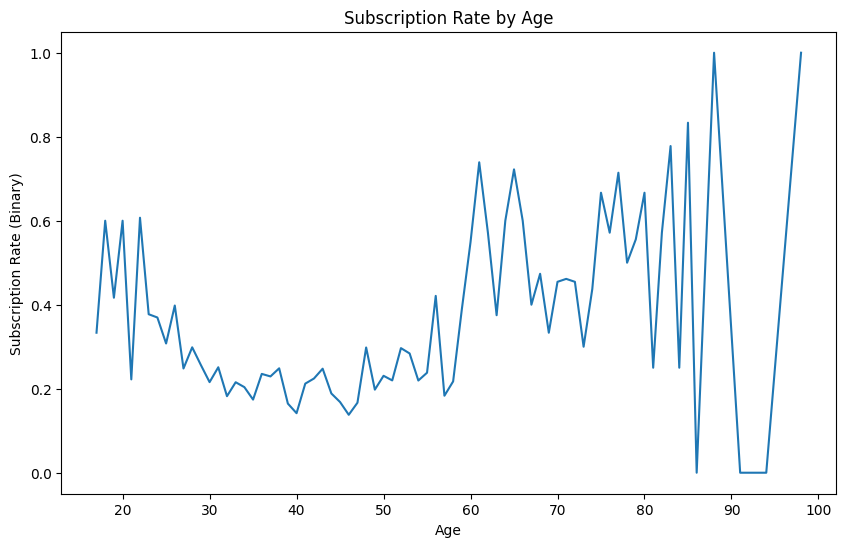

In [166]:
subscription_rate_by_age = dataset5.groupby('age')['response_binary'].mean()

# Plot subscription rate by age
plt.figure(figsize=(10, 6))
sns.lineplot(x=subscription_rate_by_age.index, y=subscription_rate_by_age, palette='oranges')  # Line plot with green color
plt.title('Subscription Rate by Age')
plt.xlabel('Age')
plt.ylabel('Subscription Rate (Binary)')
plt.show()

In [167]:

"""import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Separate minority and majority classes
df_majority = pd.concat([X_train, y_train], axis=1)[y_train == 'no']
df_minority = pd.concat([X_train, y_train], axis=1)[y_train == 'yes']

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Separate features and target variable from the upsampled data
X_train_upsampled = df_upsampled.drop('y', axis=1)
y_train_upsampled = df_upsampled.y

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the upsampled data
dt_classifier.fit(X_train_upsampled, y_train_upsampled)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))"""

'import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nfrom sklearn.utils import resample\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Separate minority and majority classes\ndf_majority = pd.concat([X_train, y_train], axis=1)[y_train == \'no\']\ndf_minority = pd.concat([X_train, y_train], axis=1)[y_train == \'yes\']\n\n# Upsample minority class\ndf_minority_upsampled = resample(df_minority,\n                                 replace=True,     # sample with replacement\n                                 n_samples=len(df_majority),    # to match majority class\n                                 random_state=42)  # reproducible results\n\n# Combine majority class with upsampled minority class\ndf_upsampled = pd.concat([df_majority, df_min

## **Dealing with Class Imbalance Problem**

In [168]:
# Step 1: Define features (X) and target (y)
X = df.drop('y', axis=1)  # Drop the target column 'y'
y = df['y']  # Target column

# Step 2: One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical columns to numerical

# Step 3: Check class distribution before SMOTE
print("Original class distribution:", Counter(y))

# Step 4: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Step 5: Check class distribution after SMOTE
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({'no': 36548, 'yes': 4640})
Resampled class distribution: Counter({'no': 36548, 'yes': 36548})


## **Applying Random Forest**

In [169]:
# Step 1: One-hot encode categorical features
X = df.drop('y', axis=1)  # Drop target column 'y'
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical columns to numerical

y = df['y']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier with class weights to handle imbalance
classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", classifier.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9109007040543822

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95     10968
         yes       0.67      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357


Confusion Matrix:
 [[10689   279]
 [  822   567]]


## **Applying Decision Tree**

In [170]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier with class weights to handle imbalance
classifier_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model
classifier_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = classifier_dt.predict(X_test)

# Evaluate the model
print("Accuracy:", classifier_dt.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.8934207331876669

Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.94      0.94     10968
         yes       0.53      0.50      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.73      0.72      0.73     12357
weighted avg       0.89      0.89      0.89     12357


Confusion Matrix:
 [[10347   621]
 [  696   693]]


## **Applying Logistic Regression**

In [171]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split


# Step 1: One-hot encode categorical features
X = df.drop('y', axis=1)  # Drop the target column 'y'
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical columns to numerical

y = df['y']  # Target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Initialize Logistic Regression model
logistic_regressor = LogisticRegression(random_state=42, max_iter=1000)  # Increase iterations for convergence

# Step 4: Train the model
logistic_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_logistic = logistic_regressor.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic, pos_label='yes')  # Set positive class as 'yes'

print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))


Accuracy: 0.9109007040543822

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Confusion Matrix:
 [[7108  195]
 [ 539  396]]
